### Necessary Imports

In [ ]:
import pandas as pd # To play with the data
import numpy as np # To create multidimensional arrays
import matplotlib.pyplot as plt # visualization and EDA
import seaborn as sns # visualization and EDA
from google.colab import files
import io

### Importing our Data

In [ ]:
data_to_upload = files.upload()

Saving Train.csv to Train.csv


In [ ]:
df_train = pd.read_csv(io.BytesIO(data_to_upload['Train.csv']))
df_test = pd.read_csv('https://raw.githubusercontent.com/Victoran0/BigMart-Sales-Prediction/main/Dataset/Test.csv')

In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_test.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### We can fill in our null values with the mean if it is a numerical value and we can fill it with the mode of the present data if it is an object.
From the above, we can fill in the item weight with the mean value and the outlet size null values with the mode.

In [ ]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)
# inpplace=True means to replace it permanently
# we can use the dtale library to check for outliers
# if there are outliers, we should use the median to fill in the values (for numerical values)

In [ ]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [ ]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)
# It is a categorical column, to fill mussing values, we use the mode inputation

In [ ]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Selecting Features based on general requirements / Dimensionality Reduction

In [ ]:
df_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
# Axis = 1 means columns to drop, axis = 0 means rows

In [ ]:
df_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [ ]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### EDA with Dtale Library

In [ ]:
!pip install dtale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.9 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62566 sha256=d5a9f1eab35bb8de40fc4b4ccdedba992feae8064530aa27c66c643a1d86eef3
  Stored in directory:

In [ ]:
import dtale

ModuleNotFoundError: No module named 'dtale'

In [ ]:
dtale.show(df_train)
 #This works on top of pandas

http://71ae889bbb22:40000/dtale/main/4

### EDA using Ydata Profiling

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=191e28117d4716c0902be7c59bb2b25640618d0acf3d2a758d5f5ccbf361ebe4
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's depende

In [ ]:
import ydata_profiling
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df_train, title='Profiling Report')

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA
in this part, we would be using seaborn

<ipython-input-20-247735d14160>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


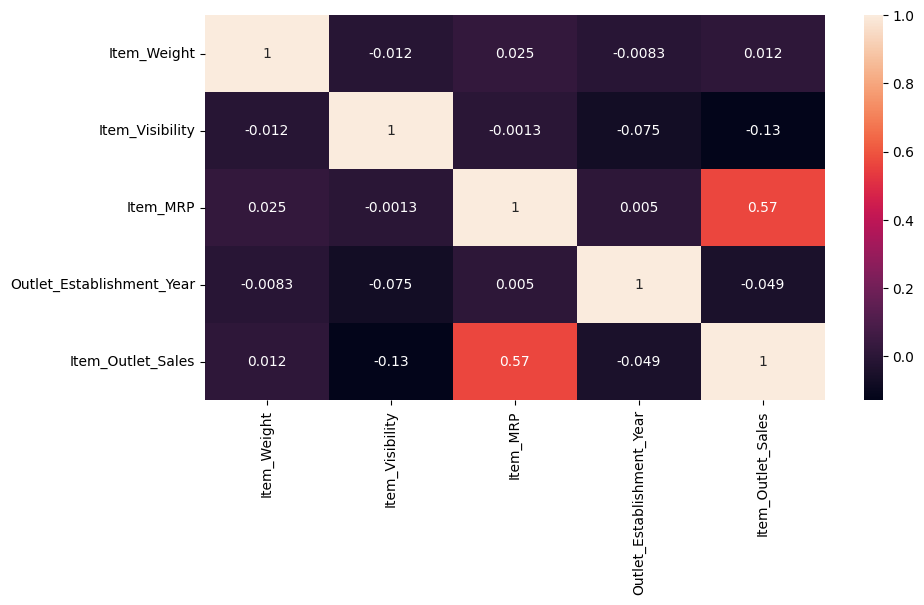

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.corr(), annot=True)
# The annot arg displays the values
plt.show()

### EDA using klib library

In [ ]:
!pip install klib

In [ ]:
import klib

GridSpec(6, 5)

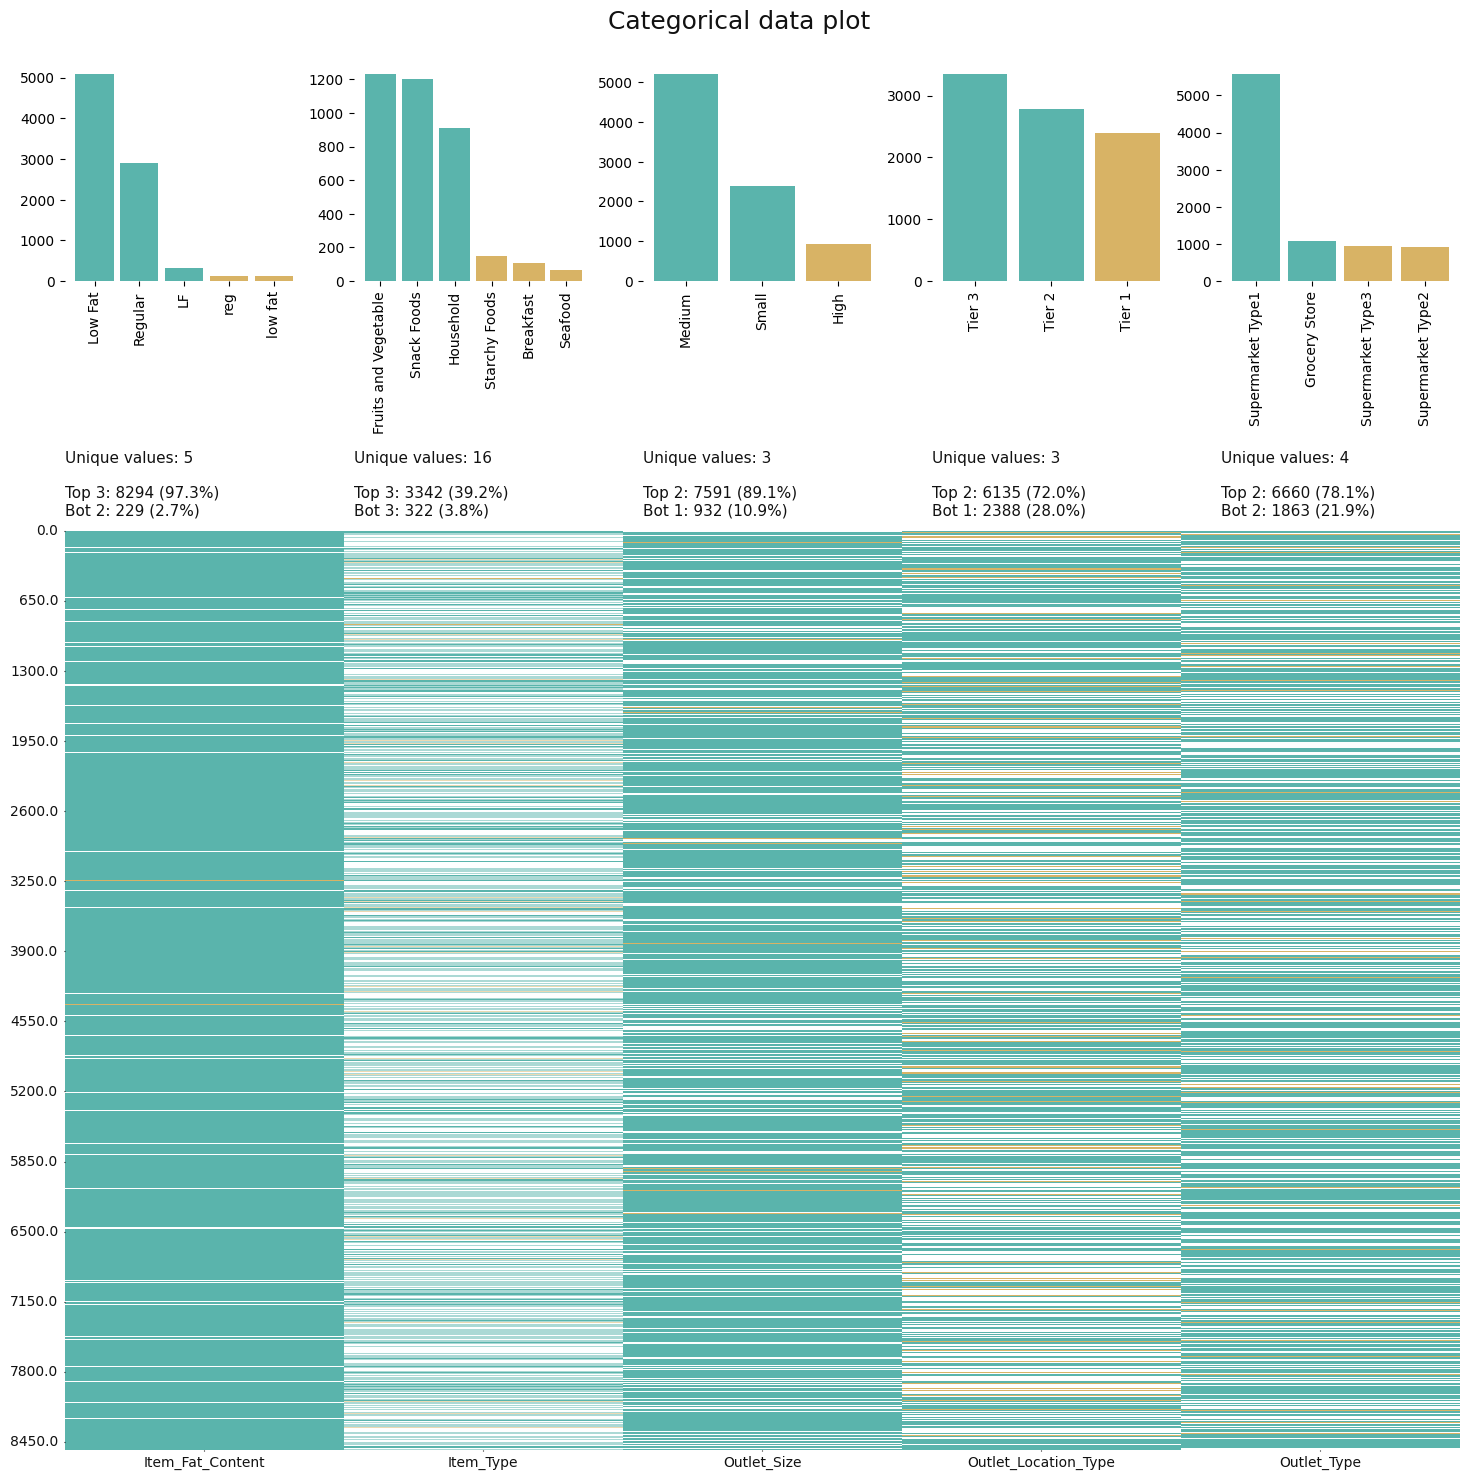

In [ ]:
# klib.describe - function for visualizing datasets
klib.cat_plot(df_train) # returns a visualization fo the number and frequency at cagorical features

In [ ]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: xlabel='Item_Visibility', ylabel='Density'>

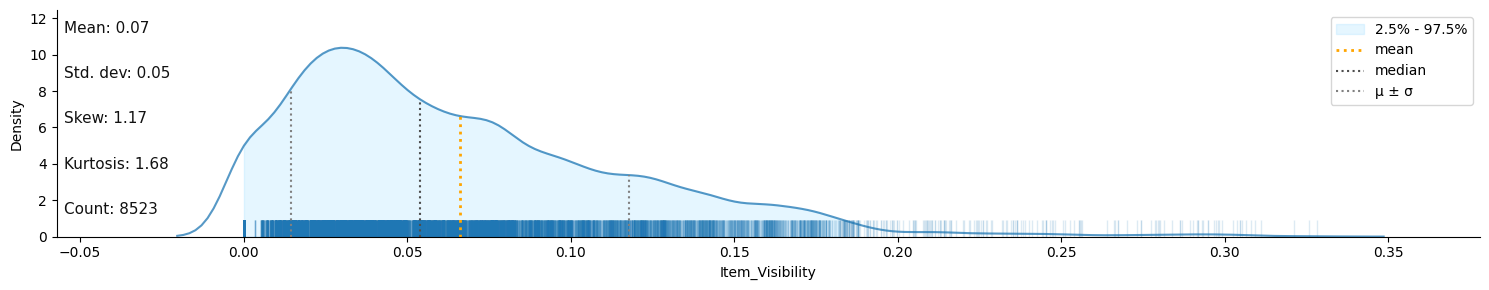

In [ ]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature

In [ ]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

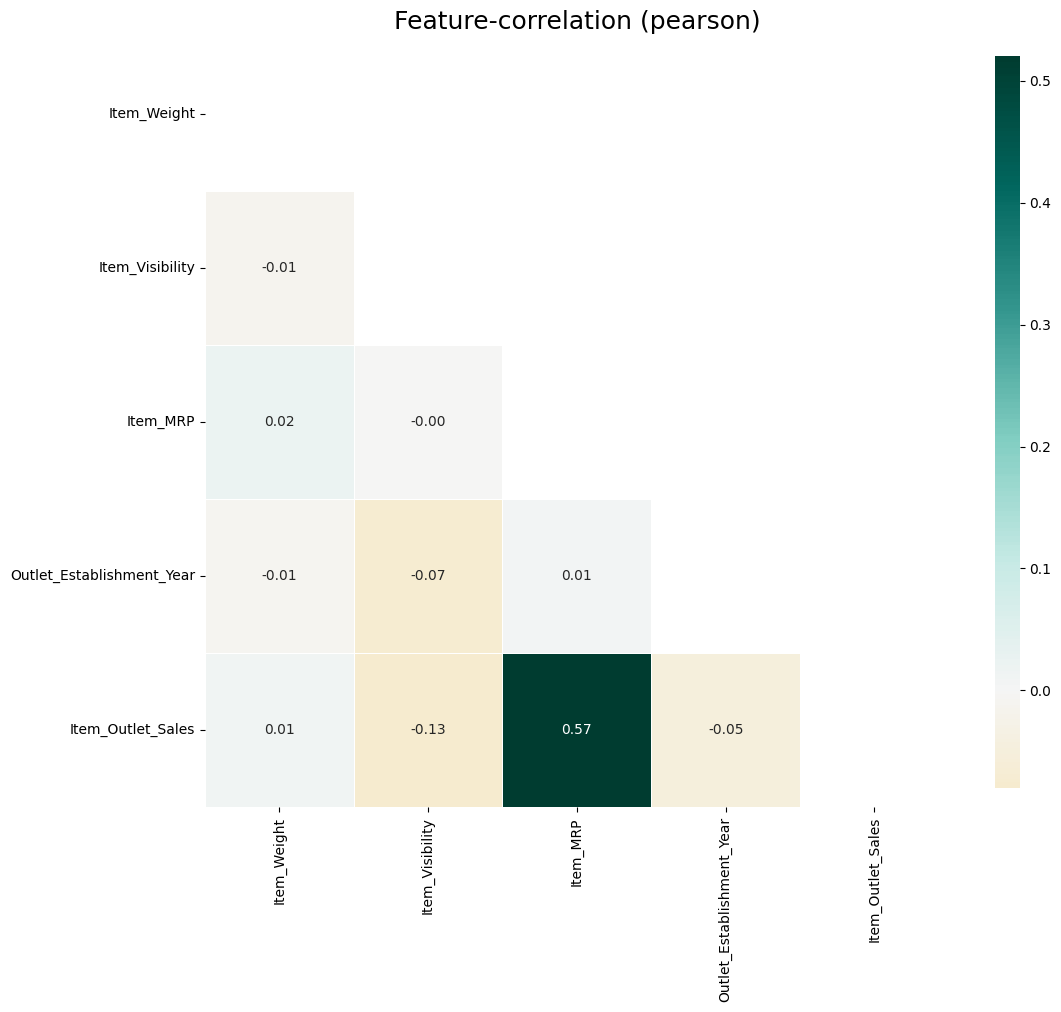

In [ ]:
klib.corr_plot(df_train) # returns a color encoded heatmap, ideal for correlation


### Data Cleaning Using Klib Library

In [ ]:
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [ ]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df_train = klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [ ]:
klib.drop_missing(df_train) # drops missing values, also called in data_cleaning()
klib.mv_col_handling(df_train) # drops features with high ratio of missing vals based on informational content
klib.pool_duplicate_subsets(df_train) # pools subset of cols based on duplicates with min. loss of information

,Item_Visibility,Item_MRP,Item_Outlet_Sales,pooled_vars
0,0.016047,249.809204,3735.137939,0
1,0.019278,48.269199,443.422791,1
2,0.016760,141.617996,2097.270020,2
3,0.000000,182.095001,732.380005,3
4,0.000000,53.861401,994.705200,4
...,...,...,...,...
8518,0.056783,214.521805,2778.383301,8518
8519,0.046982,108.156998,549.284973,8519
8520,0.035186,85.122398,1193.113647,8520
8521,0.145221,103.133202,1845.597656,8521


In [ ]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


### Preprocessing Task before Model Building

#### 1. Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_train['item_fat_content'] = le.fit_transform(df_train['item_fat_content'])

In [ ]:
df_train['item_type'] = le.fit_transform(df_train['item_type'])

In [ ]:
df_train['outlet_size'] = le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type'] = le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type'] = le.fit_transform(df_train['outlet_type'])


In [ ]:
# df_train['outlet_establishment_year'] = le.fit_transform(df_train['outlet_establishment_year'])

In [ ]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


### We can easily get it done to our dataset universally instead of column by column, using the code below

In [ ]:
# df_train = df_train.apply(le.fit_transform)
# The above code would convert every column in df_trian, we can use this if all our columns are categorical

### The disadvantage of label encoding is that our model will treat higher values row as if they are more effective or have more result without knowing it is just the number for that category and one hot encoding solves that by giving us a 0 and 1 value and creating new columns for each category

### One Hot Encoding

Label encoding just give labels but one hot encoding makes your categorical values a new row and encodes for the row that has that data in it. 1 if the row that has that catetogry and 0 for the other categories

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

### Another way to do the One Hot Encoding is the below pandas.get_dummies

In [ ]:
df_train = pd.get_dummies(df_train, columns=['item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type'])

In [ ]:
df_train

,item_weight,item_visibility,item_type,item_mrp,outlet_establishment_year,item_outlet_sales,item_fat_content_0,item_fat_content_1,item_fat_content_2,item_fat_content_3,...,outlet_size_0,outlet_size_1,outlet_size_2,outlet_location_type_0,outlet_location_type_1,outlet_location_type_2,outlet_type_0,outlet_type_1,outlet_type_2,outlet_type_3
0,9.300000,0.016047,4,249.809204,1999,3735.137939,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920000,0.019278,14,48.269199,2009,443.422791,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500000,0.016760,10,141.617996,1999,2097.270020,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200001,0.000000,6,182.095001,1998,732.380005,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930000,0.000000,9,53.861401,1987,994.705200,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,0.056783,13,214.521805,1987,2778.383301,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380000,0.046982,0,108.156998,2002,549.284973,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600000,0.035186,8,85.122398,2004,1193.113647,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210000,0.145221,13,103.133202,2009,1845.597656,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


### The issue with one hot encoding is that it tries to increase the size of our column and it can be a lot if we are not careful with it, we should see which column data really needs the one hot encoding

### Splitting our data into Test and Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_train.drop('item_outlet_sales', axis=1)

In [ ]:
Y = df_train['item_outlet_sales']

In [ ]:
Y

0       3735.137939
1        443.422791
2       2097.270020
3        732.380005
4        994.705200
           ...     
8518    2778.383301
8519     549.284973
8520    1193.113647
8521    1845.597656
8522     765.669983
Name: item_outlet_sales, Length: 8523, dtype: float32

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101, test_size=0.2)

In [ ]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

### Standardization of Data
We notice our dataset is highly ranging numerically. We would need to standardize the dataset so the model gets it in best fit where by the mean will be 0 and the standard deviation will be 1.
As we can see below, the reverse is the case

In [ ]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275066,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train_std = sc.fit_transform(X_train)

### For random forest and decision tree, we do not need to scale our data
Whichever model needs to converge, the one that needs to calculate the distance require the normalized one

In [ ]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

### We would only apply transform scaling without fit on our test data.
Fit means learning how the data is distributed in the dataset.
After learning, we do not want data leakage, so we just want to transform it

*** Learn more about data leakage ***

In [ ]:
X_test_std = sc.transform(X_test)

In [ ]:
X_test_std

array([[-0.43860916, -0.21609253,  0.18795264, ..., -1.36686554,
         2.8659228 , -0.35759513],
       [ 1.22570184, -0.52943464,  1.37098543, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.2184578 ,  0.16277341, -1.46829326, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.65508101,  0.8782423 ,  0.89777232, ..., -1.36686554,
        -0.34892775, -0.35759513],
       [ 1.01171909, -1.28409256,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513],
       [-1.56558541, -1.09265374,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513]])

In [ ]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [ ]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [1]:
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

joblib.dump(sc, '/content/drive/MyDrive/Machine Learning Models/sc.sav')

### Model Building

We are going to be trying 2 ml models, random forest and linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train_std, Y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_std)

### We are going to use the r2 score which is the accuracy of linesr regression

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print(r2_score(Y_test, y_pred))
print(mean_absolute_error(Y_test, y_pred))
# We use np.sqrt to get the root of the mean squared error called root squared error
print(np.sqrt(mean_squared_error(Y_test, y_pred)))

0.5041875773270632
880.9999044084501
1162.4412631603457


### Second Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)

In [ ]:
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
print(r2_score(Y_test, y_pred_rf))
print(mean_absolute_error(Y_test, y_pred_rf))
# We use np.sqrt to get the root of the mean squared error called root squared error
print(np.sqrt(mean_squared_error(Y_test, y_pred_rf)))

0.5492133735425984
781.5049976293546
1108.4033441282645


### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth = range(1, 31)
min_samples_leaf = np.linspace(0.1, 1.0)
max_features = ["auto", "sqrt", "log2"]
min_samples_split = np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators = n_estimators)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                                  scoring='r2', error_score=0, verbose=2, cv=2)
grid_search_forest.fit(X_train, Y_train)

#summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.514 (0.010) with: {'n_estimators': 10}
0.548 (0.006) with: {'n_estimators': 100}
0.550 (0.005) with: {'n_estimators': 1000}


In [ ]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [ ]:
grid_search_forest.best_score_

0.5503857393935687

In [ ]:
y_pred_rf_grid = grid_search_forest.predict(X_test)

In [ ]:
r2_score(Y_test, y_pred_rf_grid)

0.5505524857984543

### Save Our Model

In [ ]:
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

joblib.dump(grid_search_forest, '/content/drive/MyDrive/Machine Learning Models/bigmart_Model.sav')

Mounted at /content/drive


['/content/drive/MyDrive/bigmart_Model.sav']

### Loading our saved model: IT would be saved with the training it has, we do not have to re train or re iterate any of the previous steps, we can just load in our model directly

In [ ]:
model = joblib.load('/content/drive/MyDrive/Machine Learning Models/bigmart_Model.sav')

In [ ]:
model.predict(X_test)

array([1726.05387784, 3566.89561029, 1290.03678229, ...,  391.59626181,
       1654.58558253, 2431.52426434])